## Assessment 2
### Problem 2: Try different hyperparameters and perform convolution transform on an image

# Convolution operation on an image

The convolution layer (CONV) uses filters that perform convolution operations as it is scanning the input ***I*** with respect to its dimensions. Its hyperparameters include the filter size ***F*** and stride ***S***. The resulting output ***O*** is called feature map or activation map.

![](https://stanford.edu/~shervine/teaching/cs-230/illustrations/convolution-layer-a.png)

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.measure

### Loading the image form local directory and checking the entropy of the image

Entropy for the original image is: 7.4473113904233825


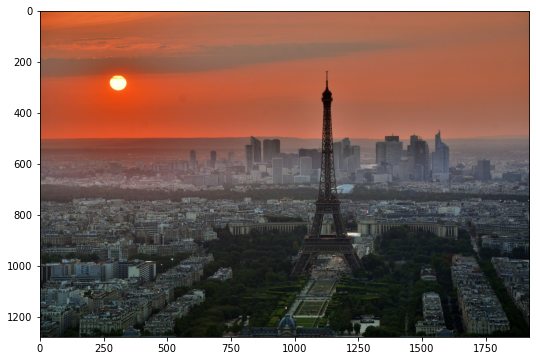

In [16]:
input_image = cv2.imread('../input/dataset9/paris-843229_1920.jpg')
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, figsize=(9,6))
entropy1 = skimage.measure.shannon_entropy(input_image)
print("Entropy for the original image is:",entropy1)
plt.imshow(input_image)

### Use a simple 3x3 filter on the image and demonstrate the transformed image with its entropy
#### Filter
A filter of size ***F × F*** applied to an input containing ***C*** channels is a ***F × F × C*** volume that performs convolutions on an input of size ***I × I × C*** and produces an output feature map (also called activation map) of size ***O × O × 1***.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/12/Screenshot-from-2018-12-07-15-47-38.png)

#### Kernel

In [17]:
sharpenfilter = np.array(([[0, -1, 0], [-1, 9, -1], [0, -1, 0]]), np.float32)/9
sharpenfilter

array([[ 0.        , -0.11111111,  0.        ],
       [-0.11111111,  1.        , -0.11111111],
       [ 0.        , -0.11111111,  0.        ]], dtype=float32)

#### Transformation and output image with its Entropy

Entropy for the sharpened image is: 6.647542774487621


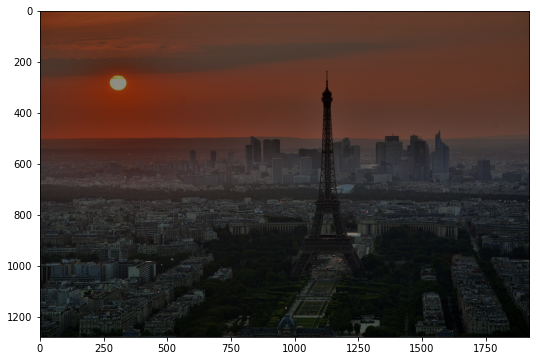

In [18]:
sharpen = cv2.filter2D(src=input_image, kernel=sharpenfilter, ddepth=-1)
fig, ax = plt.subplots(1, figsize=(9,6))
entropy2 = skimage.measure.shannon_entropy(sharpen)
print("Entropy for the sharpened image is:",entropy2)
plt.imshow(sharpen)

### Use a simple 5x5 filter on the image and demonstrate the transformed image with its entropy

#### Filter or Kernel

In [19]:
gaussian_blur_filter = np.array(([[1,4,6,4,1], [4,16,24,16,4], [6,24,36,24,6], [4,16,24,16,4], [1,4,6,4,1]]), np.float32)/256
gaussian_blur_filter

array([[0.00390625, 0.015625  , 0.0234375 , 0.015625  , 0.00390625],
       [0.015625  , 0.0625    , 0.09375   , 0.0625    , 0.015625  ],
       [0.0234375 , 0.09375   , 0.140625  , 0.09375   , 0.0234375 ],
       [0.015625  , 0.0625    , 0.09375   , 0.0625    , 0.015625  ],
       [0.00390625, 0.015625  , 0.0234375 , 0.015625  , 0.00390625]],
      dtype=float32)

#### Transformation and Output image with Entropy

Entropy for the blurred image is: 7.395531620068165


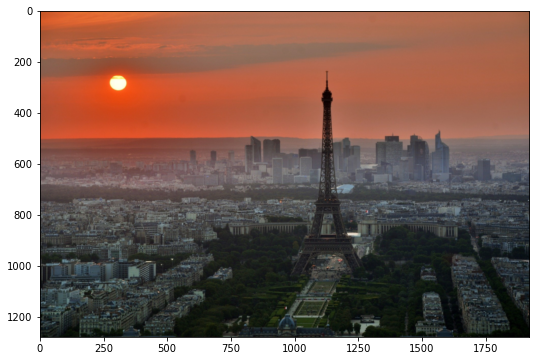

In [20]:
gaussianBlur = cv2.filter2D(src=input_image, kernel=gaussian_blur_filter, ddepth=-1)
entropy3 = skimage.measure.shannon_entropy(gaussianBlur)
print("Entropy for the blurred image is:",entropy3)
fig, ax = plt.subplots(1, figsize=(9,6))
plt.imshow(gaussianBlur)

In [21]:
grey_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

### Filtering an image with 3x3 filter with a stride = 2 and then calculate its Entropy
#### Stride
For a convolutional or a pooling operation, the stride ***S*** denotes the number of pixels by which the window moves after each operation.

![](https://stanford.edu/~shervine/teaching/cs-230/illustrations/stride.png?36b5b2e02f7e02c3c4075a9d836c048c)

Entropy for an image with kernel = 3x3 and stride = 2 is: 3.222862544247595


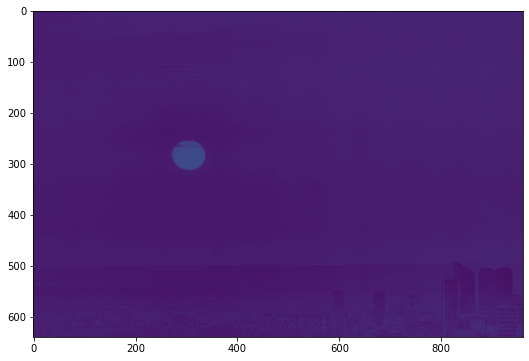

In [22]:
def convolve2D(image, kernel, strides):
    kernel = np.flipud(np.fliplr(kernel))
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]
    xOutput = int(((xImgShape - xKernShape + 2) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2) / strides) + 1)
    output = np.zeros((xOutput, yOutput))
    for y in range(image.shape[1]):
        if y > image.shape[1] - yKernShape:
            break
        if y % strides == 0:
            for x in range(image.shape[0]):
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    if x % strides == 0:
                        output[x, y] = (kernel * image[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break
    return output

kernel = np.array(([[0, -1, 0], [-1, 9, -1], [0, -1, 0]]), np.float32)/9
optimg = convolve2D(grey_image, kernel, strides = 2)
entropy6 = skimage.measure.shannon_entropy(optimg)
print("Entropy for an image with kernel = 3x3 and stride = 2 is:",entropy6)
fig, ax = plt.subplots(1, figsize=(9,6))
plt.imshow(optimg)

### Filtering an image with 5x5 filter with a stride = 2 and then calculate its Entropy

Entropy for an image with kernel = 5x5 and stride = 2 is: 4.189303058746414


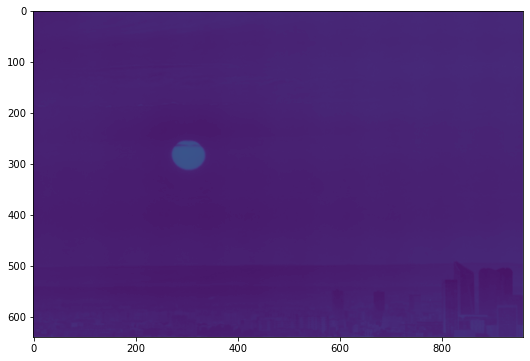

In [23]:
def convolve2D(image, kernel, strides):
    kernel = np.flipud(np.fliplr(kernel))
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]
    xOutput = int(((xImgShape - xKernShape + 2 ) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 ) / strides) + 1)
    output = np.zeros((xOutput, yOutput))
    for y in range(image.shape[1]):
        if y > image.shape[1] - yKernShape:
            break
        if y % strides == 0:
            for x in range(image.shape[0]):
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    if x % strides == 0:
                        output[x, y] = (kernel * image[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break
    return output

kernel = np.array(([[1,4,6,4,1], [4,16,24,16,4], [6,24,36,24,6], [4,16,24,16,4], [1,4,6,4,1]]), np.float32)/256
optimg = convolve2D(grey_image, kernel, strides = 2)
entropy7 = skimage.measure.shannon_entropy(optimg)
print("Entropy for an image with kernel = 5x5 and stride = 2 is:",entropy7)
fig, ax = plt.subplots(1, figsize=(9,6))
plt.imshow(optimg)

### Filtering an image with 3x3 filter with stride = 1 and zero padding, then calculate its Entropy
#### Zero Padding

Zero-padding denotes the process of adding ***P*** zeroes to each side of the boundaries of the input.

![](http://xrds.acm.org/blog/wp-content/uploads/2016/06/Figure_3.png)

Entropy for the 3x3 image with zero padding and stride = 1 is: 6.055754583579611


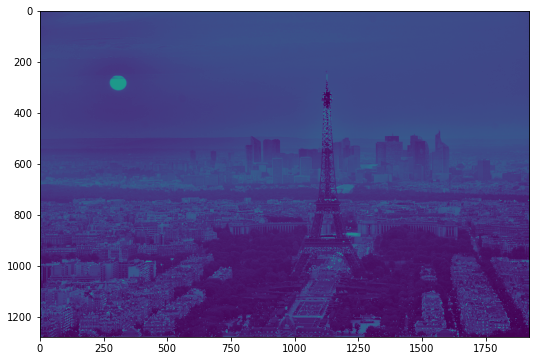

In [24]:
def convolve2d(image, kernel):
    output = np.zeros_like(image)
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1] = image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            output[y, x]=(kernel * image_padded[y: y+3, x: x+3]).sum()
    return output
# For a 3x3 Kernel and stride = 1 and Zero_padding
KERNEL = np.array(([[0, -1, 0], [-1, 9, -1], [0, -1, 0]]), np.float32)/9
stride_1_3x3 = convolve2d(grey_image, kernel=KERNEL)
entropy4 = skimage.measure.shannon_entropy(stride_1_3x3)
print("Entropy for the 3x3 image with zero padding and stride = 1 is:",entropy4)
fig, ax = plt.subplots(1, figsize=(9,6))
plt.imshow(stride_1_3x3)

### Filtering an image with 5x5 filter with stride = 1 and zero padding, then calculate its Entropy

In [27]:
def convolve2d(image, kernel):
    output = np.zeros_like(image)
    image_padded = np.zeros((image.shape[0] + 4, image.shape[1] + 4))
    image_padded[2:-2, 2:-2] = image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            output[y, x]=(kernel * image_padded[y: y+5, x: x+5]).sum()
    return output
# For a 5x5 Kernel and stride = 1 and Zero_padding
KERNEL = np.array(([[1,4,6,4,1], [4,16,24,16,4], [6,24,36,24,6], [4,16,24,16,4], [1,4,6,4,1]]), np.float32)/256
opimg = convolve2d(grey_image, kernel=KERNEL)
entropy5 = skimage.measure.shannon_entropy(opimg)
print("Entropy for the 5x5 image with zero padding and stride = 1 is:",entropy5)
fig, ax = plt.subplots(1, figsize=(9,6))
plt.imshow(opimg)

Entropy for the 5x5 image with zero padding and stride = 1 is: 6.715918610760809


error: OpenCV(4.5.1) /tmp/pip-req-build-tk9iuyva/opencv/modules/highgui/src/window.cpp:634: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvNamedWindow'
